In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
plt.style.use(['science','notebook'])

When a beam of photons with energy $E$ is sent through a material, the number of photons (measured in some time interval), decreases exponentially with distance, due to interactions with the material

$$n(x) = n(0)e^{-\mu(E)x}$$

Note that $\mu(E)$, the **attenuation coefficient**, depends on the energy $E$ of the photons.

<p align="center">
  <img src="../images/photons.png" alt="drawing" width="300" align="center"/>
</p>

In general, a beam of photons doesn't have the same energy. Let $N(E)$ be the number of photons in the beam with energy *less than or equal to* $E$. Then the number of photons at energy $E$ is

$$dN = \frac{dN}{dE}dE$$

Now the **fluence** is defined as $\Phi(E)=N(E)/A$ (number of photons with energy less than $E$ per unit area). This tells us that $d\Phi(E)$, the number of photons with energy $E$ per unit area, is

$$d\Phi(E) = \frac{d\Phi(E)}{dE}dE = \frac{1}{A}\frac{dN(E)}{dE}dE$$

**Beams are actually measured using $d\Phi$**. In this sense, $d\Phi/dE$ is like a spectral density of photon energies.

Now suppose one starts with the spectral density $d\Phi/dE$. What does the density look like after moving a distance $x$ through some material?

$$
\begin{align}
&n(x) = n(0) e^{-\mu(E) x}\\
\implies & dN(x,E) = dN(0,E) e^{-\mu(E) x}\\
\implies & \frac{dN(x,E)}{dE} = \frac{dN(0,E)}{dE} e^{-\mu(E) x}\\
\implies & \frac{d\Phi(x,E)}{dE} = \frac{d\Phi(0,E)}{dE}e^{-\mu(E) x}
\end{align}
$$

So our spectrum, $\frac{d\Phi(x,E)}{dE}$, depends on the initial spectrum before going through the material $\frac{d\Phi(0,E)}{dE}$ plus the attenuation factor $e^{-\mu(E) x}$

Lets looks at some data for a particular material:

In [67]:
E_data = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ])

mu_data = np.array([0.04999041, 0.04277302, 0.03549048, 0.03178857, 0.02901388,
       0.02782302, 0.02567083, 0.02357278, 0.02118703, 0.01894664,
       0.01723952, 0.01476657, 0.01176935, 0.00999207, 0.00880421,
       0.00793411, 0.00679437, 0.0061037 ])

dPhidE0_data = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

Plot $\mu(E)$ for this material

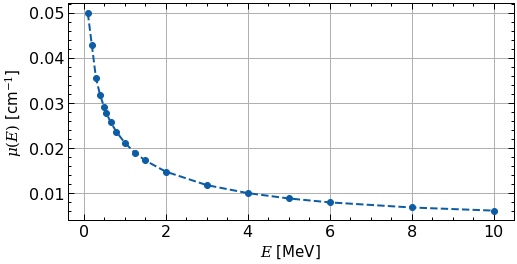

In [68]:
plt.figure(figsize=(8,4))
plt.plot(E_data, mu_data, 'o--')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.grid()
plt.show()

Plot the spectrum of our beam $d\Phi(0,E)/dE$

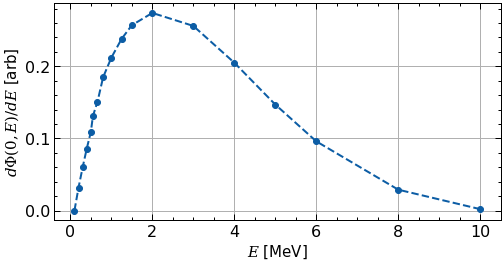

In [69]:
plt.figure(figsize=(8,4))
plt.plot(E_data, dPhidE0_data, 'o--')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.show()

Lets see what happens with the spectrum:

$$\frac{d\Phi(x,E)}{dE} = \frac{d\Phi(0,E)}{dE}e^{-\mu(E) x}$$

for different values of $x$:

In [70]:
dPhidE5_data = dPhidE0_data*np.exp(-mu_data*5)
dPhidE20_data = dPhidE0_data*np.exp(-mu_data*20)
dPhidE40_data = dPhidE0_data*np.exp(-mu_data*40)

Plot

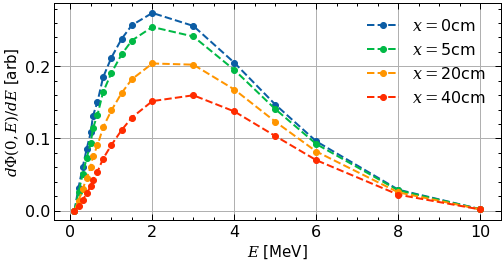

In [71]:
plt.figure(figsize=(8,4))
plt.plot(E_data, dPhidE0_data, 'o--', label='$x=$0cm')
plt.plot(E_data, dPhidE5_data, 'o--', label='$x=$5cm')
plt.plot(E_data, dPhidE20_data, 'o--', label='$x=$20cm')
plt.plot(E_data, dPhidE40_data, 'o--', label='$x=$40cm')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.legend()
plt.show()

The expectation value of $E^n$ can be used to compute statistics

$$\bar{E^n} = \frac{\int E^n dN(E)}{\int dN(E)} = \frac{\int E^n \frac{dN(E)}{dE} dE}{\int \frac{dN(E)}{dE} dE} = \frac{\int E^n \frac{d\Phi(E)}{dE} dE}{\int \frac{d\Phi(E)}{dE} dE}$$

And then

* Mean energy $\bar{E}$
* Standard deviation $\sqrt{\bar{E^2}-\bar{E}^2}$
* etc...

Note that these are all a function of distance $x$ as well in the material!

If we want to compute that integral, we should first interpolate the data and then use scipy's `quad` function to integrate.

In [74]:
mu_f = interp1d(E_data, mu_data, kind='cubic')
dPhidE0_f = interp1d(E_data, dPhidE0_data, kind='cubic')

E_cont = np.linspace(min(E_data), max(E_data), 100)
mu_cont = mu_f(E_cont)
dPhidE0_cont = dPhidE0_f(E_cont)

Continuous extension using interpolation for $\mu(E)$:

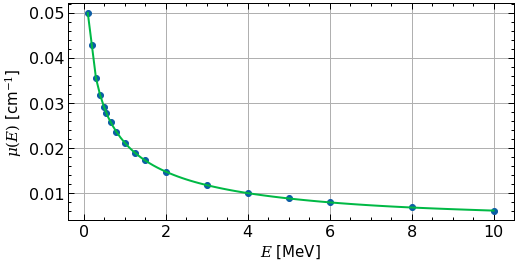

In [75]:
plt.figure(figsize=(8,4))
plt.plot(E_data, mu_data, 'o')
plt.plot(E_cont, mu_cont, '-')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.grid()
plt.show()

Continuous extension using interpolation for $d\Phi(0,E)/dE$:

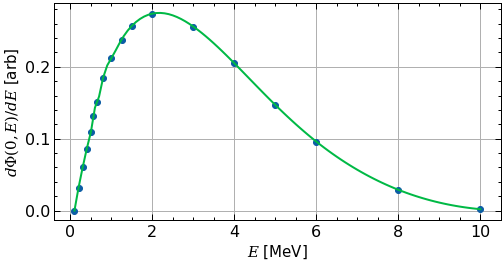

In [76]:
plt.figure(figsize=(8,4))
plt.plot(E_data, dPhidE0_data, 'o')
plt.plot(E_cont, dPhidE0_cont, '-')
plt.xlabel('$E$ [MeV]', fontsize=15)
plt.ylabel('$d\Phi(0,E)/dE$ [arb]', fontsize=15)
plt.grid()
plt.show()

Function to compute expectation value of $E^{n}$ using

$$\bar{E^n} = \frac{\int E^n \frac{d\Phi(E)}{dE} dE}{\int \frac{d\Phi(E)}{dE} dE}$$

In [77]:
def get_En(x, n):
    numerator = quad(lambda E: E**n *dPhidE0_f(E)*np.exp(-mu_f(E) * x),
                     min(E_data), max(E_data))[0]
    denominator = quad(lambda E: dPhidE0_f(E)*np.exp(-mu_f(E) * x),
                     min(E_data), max(E_data))[0]
    return numerator/denominator

def get_std(x):
    return np.sqrt(get_En(x,2)-get_En(x,1)**2)

Get some data for the mean energy and standard deviation of energy for different values of $x$ (width of absorber)

In [78]:
x = np.linspace(0,100,100)
mean_energy = np.vectorize(get_En)(x, 1)
stddev_energy = np.vectorize(get_std)(x)

Plot

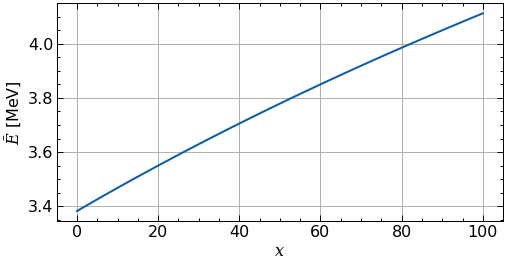

In [79]:
plt.figure(figsize=(8,4))
plt.plot(x, mean_energy)
plt.ylabel(r'$\bar{E}$ [MeV]')
plt.xlabel('$x$')
plt.grid()

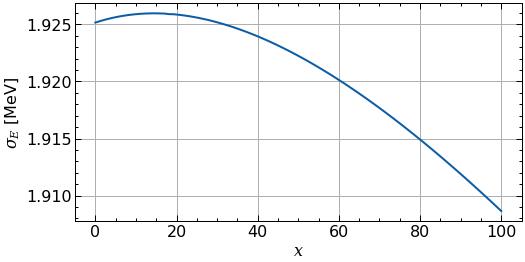

In [80]:
plt.figure(figsize=(8,4))
plt.plot(x, stddev_energy)
plt.ylabel(r'$\sigma_E$ [MeV]')
plt.xlabel('$x$')
plt.grid()